Bina model klasifikasi: Masakan Asia dan India yang Lazat


## Pengelas Masakan 1

Dalam pelajaran ini, kita akan meneroka pelbagai pengelas untuk *meramal jenis masakan kebangsaan berdasarkan kumpulan bahan-bahan.* Sambil melakukannya, kita akan mempelajari lebih lanjut tentang beberapa cara algoritma boleh digunakan untuk tugas pengelasan.

### [**Kuiz sebelum kuliah**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **Persediaan**

Pelajaran ini adalah lanjutan daripada [pelajaran sebelumnya](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) di mana kita:

-   Membuat pengenalan ringkas kepada pengelasan menggunakan dataset tentang semua masakan hebat dari Asia dan India 😋.

-   Meneroka beberapa [kata kerja dplyr](https://dplyr.tidyverse.org/) untuk menyediakan dan membersihkan data kita.

-   Membuat visualisasi yang cantik menggunakan ggplot2.

-   Menunjukkan cara menangani data yang tidak seimbang dengan memprosesnya menggunakan [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html).

-   Menunjukkan cara untuk `prep` dan `bake` resipi kita untuk memastikan ia berfungsi seperti yang diharapkan.

#### **Prasyarat**

Untuk pelajaran ini, kita memerlukan pakej berikut untuk membersihkan, menyediakan, dan memvisualisasikan data kita:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) adalah [koleksi pakej R](https://www.tidyverse.org/packages) yang direka untuk menjadikan sains data lebih pantas, mudah, dan menyeronokkan!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) adalah rangka kerja [koleksi pakej](https://www.tidymodels.org/packages/) untuk pemodelan dan pembelajaran mesin.

-   `themis`: [pakej themis](https://themis.tidymodels.org/) menyediakan Langkah Resipi Tambahan untuk Menangani Data Tidak Seimbang.

-   `nnet`: [pakej nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) menyediakan fungsi untuk menganggarkan rangkaian neural suapan ke hadapan dengan satu lapisan tersembunyi, dan untuk model regresi logistik multinomial.

Anda boleh memasangnya seperti berikut:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

Sebagai alternatif, skrip di bawah akan memeriksa sama ada anda mempunyai pakej yang diperlukan untuk melengkapkan modul ini dan memasangnya untuk anda jika ia tiada.


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## 1. Bahagikan data kepada set latihan dan ujian.

Mari kita mulakan dengan memilih beberapa langkah daripada pelajaran sebelumnya.

### Buang bahan yang paling biasa yang sering menyebabkan kekeliruan antara masakan yang berbeza, menggunakan `dplyr::select()`.

Semua orang suka nasi, bawang putih dan halia!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 indian  0      0        0     0          0     0            0       0       
2 indian  1      0        0     0          0     0            0       0       
3 indian  0      0        0     0          0     0            0       0       
4 indian  0      0        0     0          0     0            0       0       
5 indian  0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       0    0   
2 0         ⋯ 0       0           0          0                       0    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     1      0

cuisine  n  
1 korean   799
2 indian   598
3 chinese  442
4 japanese 320
5 thai     289

Hebat! Sekarang, masa untuk membahagikan data supaya 70% data digunakan untuk latihan dan 30% untuk ujian. Kita juga akan menggunakan teknik `stratifikasi` semasa membahagikan data untuk `mengekalkan perkadaran setiap jenis masakan` dalam set data latihan dan validasi.

[rsample](https://rsample.tidymodels.org/), sebuah pakej dalam Tidymodels, menyediakan infrastruktur untuk pembahagian data dan pensampelan semula yang cekap:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 chinese 0      0        0     0          0     0            0       0       
2 chinese 0      0        0     0          0     0            0       0       
3 chinese 0      0        0     0          0     0            0       0       
4 chinese 0      0        0     0          0     0            0       0       
5 chinese 0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       1    0   
2 0         ⋯ 0       0           0          0                       1    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     0      0

cuisine  n  
1 korean   559
2 indian   418
3 chinese  309
4 japanese 224
5 thai     202

## 2. Menangani data tidak seimbang

Seperti yang anda mungkin perasan dalam set data asal serta set latihan kita, terdapat pengagihan yang agak tidak seimbang dalam bilangan jenis masakan. Masakan Korea *hampir* 3 kali ganda masakan Thai. Data yang tidak seimbang sering memberi kesan negatif terhadap prestasi model. Banyak model berfungsi dengan baik apabila bilangan pemerhatian adalah sama dan, oleh itu, cenderung menghadapi kesukaran dengan data yang tidak seimbang.

Terdapat dua cara utama untuk menangani set data yang tidak seimbang:

-   menambah pemerhatian kepada kelas minoriti: `Over-sampling` contohnya menggunakan algoritma SMOTE yang secara sintetik menghasilkan contoh baharu bagi kelas minoriti menggunakan jiran terdekat kes-kes tersebut.

-   mengeluarkan pemerhatian daripada kelas majoriti: `Under-sampling`

Dalam pelajaran kita sebelum ini, kami menunjukkan cara menangani set data yang tidak seimbang menggunakan `recipe`. Recipe boleh dianggap sebagai pelan tindakan yang menerangkan langkah-langkah yang perlu diterapkan pada set data untuk menjadikannya sedia untuk analisis data. Dalam kes kita, kita ingin mempunyai pengagihan yang sama dalam bilangan jenis masakan kita untuk `training set` kita. Mari kita teruskan.


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

Anda sememangnya boleh mengesahkan (dengan menggunakan prep+bake) bahawa resipi ini akan berfungsi seperti yang anda harapkan - semua label masakan mempunyai `559` pemerhatian.

Memandangkan kita akan menggunakan resipi ini sebagai pra-pemproses untuk pemodelan, `workflow()` akan melakukan semua proses penyediaan dan pembakaran untuk kita, jadi kita tidak perlu menganggarkan resipi secara manual.

Sekarang kita sudah bersedia untuk melatih model 👩‍💻👨‍💻!

## 3. Memilih pengklasifikasi anda

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>Karya seni oleh @allison_horst</figcaption>


Sekarang kita perlu memutuskan algoritma mana yang akan digunakan untuk tugas ini 🤔.

Dalam Tidymodels, [`pakej parsnip`](https://parsnip.tidymodels.org/index.html) menyediakan antara muka yang konsisten untuk bekerja dengan model dari pelbagai enjin (pakej). Sila lihat dokumentasi parsnip untuk meneroka [jenis model & enjin](https://www.tidymodels.org/find/parsnip/#models) dan [argumen model](https://www.tidymodels.org/find/parsnip/#model-args) yang berkaitan. Kepelbagaian ini mungkin kelihatan mengelirukan pada pandangan pertama. Sebagai contoh, kaedah berikut semua termasuk teknik klasifikasi:

-   Model Klasifikasi Berasaskan Peraturan C5.0

-   Model Diskriminan Fleksibel

-   Model Diskriminan Linear

-   Model Diskriminan Teregularisasi

-   Model Regresi Logistik

-   Model Regresi Multinomial

-   Model Naive Bayes

-   Mesin Vektor Sokongan

-   Jiran Terdekat

-   Pokok Keputusan

-   Kaedah Ensemble

-   Rangkaian Neural

Senarai ini berterusan!

### **Klasifikator mana yang perlu dipilih?**

Jadi, klasifikator mana yang patut anda pilih? Selalunya, mencuba beberapa dan mencari hasil yang baik adalah cara untuk menguji.

> AutoML menyelesaikan masalah ini dengan mudah dengan menjalankan perbandingan ini di awan, membolehkan anda memilih algoritma terbaik untuk data anda. Cuba di [sini](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

Selain itu, pilihan klasifikator bergantung pada masalah kita. Sebagai contoh, apabila hasilnya boleh dikategorikan kepada `lebih daripada dua kelas`, seperti dalam kes kita, anda mesti menggunakan `algoritma klasifikasi berbilang kelas` berbanding `klasifikasi binari.`

### **Pendekatan yang lebih baik**

Pendekatan yang lebih baik daripada meneka secara rawak adalah dengan mengikuti idea dalam [ML Cheat Sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) yang boleh dimuat turun ini. Di sini, kita dapati bahawa, untuk masalah berbilang kelas kita, terdapat beberapa pilihan:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>Bahagian daripada Cheat Sheet Algoritma Microsoft, memperincikan pilihan klasifikasi berbilang kelas</figcaption>


### **Penalaran**

Mari kita lihat jika kita boleh menilai pelbagai pendekatan berdasarkan kekangan yang ada:

-   **Rangkaian Neural Mendalam terlalu berat**. Memandangkan dataset kita yang bersih tetapi minimal, dan fakta bahawa kita menjalankan latihan secara tempatan melalui notebook, rangkaian neural mendalam terlalu berat untuk tugas ini.

-   **Tiada pengklasifikasi dua kelas**. Kita tidak menggunakan pengklasifikasi dua kelas, jadi itu menolak pendekatan satu-lawan-semua.

-   **Pokok keputusan atau regresi logistik mungkin berkesan**. Pokok keputusan mungkin berkesan, atau regresi multinomial/regresi logistik berbilang kelas untuk data berbilang kelas.

-   **Pokok Keputusan Berbilang Kelas yang Ditingkatkan menyelesaikan masalah yang berbeza**. Pokok keputusan berbilang kelas yang ditingkatkan paling sesuai untuk tugas bukan parametrik, contohnya tugas yang direka untuk membina ranking, jadi ia tidak berguna untuk kita.

Selain itu, biasanya sebelum memulakan model pembelajaran mesin yang lebih kompleks seperti kaedah ensemble, adalah idea yang baik untuk membina model yang paling mudah untuk mendapatkan gambaran tentang apa yang sedang berlaku. Jadi untuk pelajaran ini, kita akan bermula dengan model `regresi multinomial`.

> Regresi logistik adalah teknik yang digunakan apabila pemboleh ubah hasil adalah kategori (atau nominal). Untuk regresi logistik binari, bilangan pemboleh ubah hasil adalah dua, manakala bilangan pemboleh ubah hasil untuk regresi logistik multinomial adalah lebih daripada dua. Lihat [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) untuk bacaan lanjut.

## 4. Latih dan nilai model regresi logistik multinomial.

Dalam Tidymodels, `parsnip::multinom_reg()`, mentakrifkan model yang menggunakan peramal linear untuk meramal data berbilang kelas menggunakan taburan multinomial. Lihat `?multinom_reg()` untuk pelbagai cara/enjin yang boleh digunakan untuk memuatkan model ini.

Untuk contoh ini, kita akan memuatkan model regresi multinomial melalui enjin lalai [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf).

> Saya memilih nilai untuk `penalty` secara rawak. Terdapat cara yang lebih baik untuk memilih nilai ini, iaitu dengan menggunakan `resampling` dan `tuning` model yang akan kita bincangkan kemudian.
>
> Lihat [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) jika anda ingin belajar lebih lanjut tentang cara menala hiperparameter model.


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


Kerja yang hebat 🥳! Sekarang kita sudah mempunyai resipi dan spesifikasi model, kita perlu mencari cara untuk menggabungkan kedua-duanya ke dalam satu objek yang akan terlebih dahulu memproses data, kemudian melatih model pada data yang telah diproses, dan juga membolehkan aktiviti pasca-pemprosesan yang berpotensi. Dalam Tidymodels, objek yang mudah ini dipanggil [`workflow`](https://workflows.tidymodels.org/) dan dengan mudah menyimpan komponen pemodelan anda! Ini adalah apa yang kita panggil *pipelines* dalam *Python*.

Jadi, mari kita gabungkan semuanya ke dalam satu workflow!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


Aliran kerja 👌👌! **`workflow()`** boleh disesuaikan dengan cara yang hampir sama seperti model. Jadi, masa untuk melatih model!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

Output menunjukkan pekali yang dipelajari oleh model semasa latihan.

### Menilai Model yang Telah Dilatih

Kini masanya untuk melihat bagaimana prestasi model 📏 dengan menilainya pada set ujian! Mari kita mulakan dengan membuat ramalan pada set ujian.


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine .pred_class
1 indian  thai       
2 indian  indian     
3 indian  indian     
4 indian  indian     
5 indian  indian

Kerja yang hebat! Dalam Tidymodels, penilaian prestasi model boleh dilakukan menggunakan [yardstick](https://yardstick.tidymodels.org/) - sebuah pakej yang digunakan untuk mengukur keberkesanan model menggunakan metrik prestasi. Seperti yang kita lakukan dalam pelajaran regresi logistik, mari kita mulakan dengan mengira matriks kekeliruan.


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

Apabila berurusan dengan pelbagai kelas, secara amnya lebih intuitif untuk menggambarkannya sebagai peta haba, seperti ini:


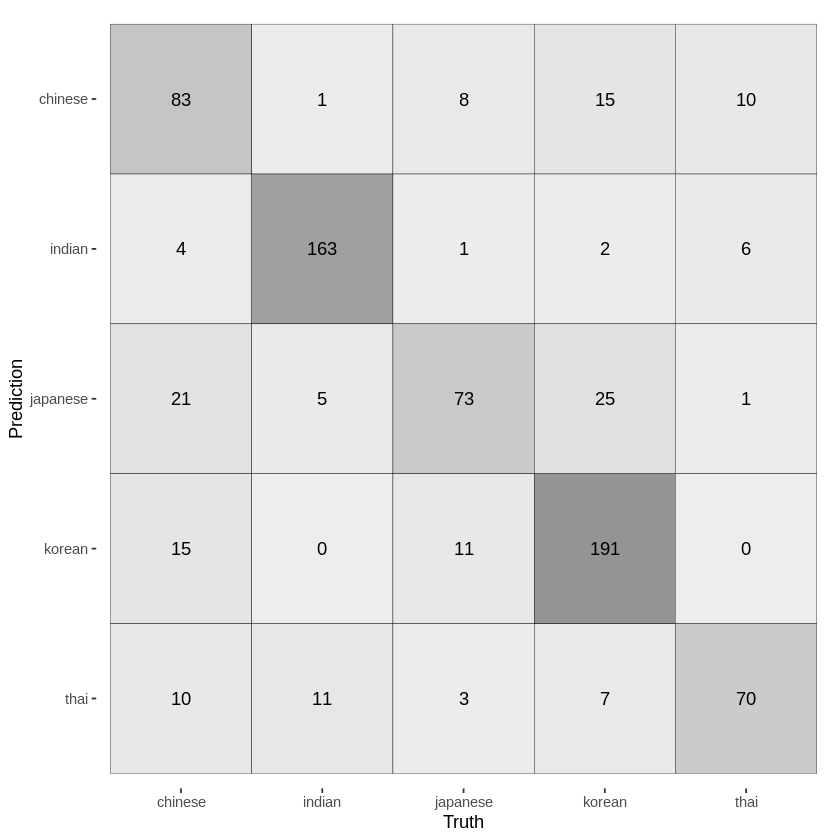

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

Petak gelap dalam plot matriks kekeliruan menunjukkan bilangan kes yang tinggi, dan anda diharapkan dapat melihat garis diagonal petak gelap yang menunjukkan kes di mana label ramalan dan label sebenar adalah sama.

Sekarang mari kita kira statistik ringkasan untuk matriks kekeliruan.


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric              .estimator .estimate
1  accuracy             multiclass 0.7880435
2  kap                  multiclass 0.7276583
3  sens                 macro      0.7780927
4  spec                 macro      0.9477598
5  ppv                  macro      0.7585583
6  npv                  macro      0.9460080
7  mcc                  multiclass 0.7292724
8  j_index              macro      0.7258524
9  bal_accuracy         macro      0.8629262
10 detection_prevalence macro      0.2000000
11 precision            macro      0.7585583
12 recall               macro      0.7780927
13 f_meas               macro      0.7641862

Jika kita fokus kepada beberapa metrik seperti ketepatan, sensitiviti, ppv, kita tidaklah terlalu teruk untuk permulaan 🥳!

## 4. Menyelami Lebih Dalam

Mari kita tanya satu soalan yang halus: Apakah kriteria yang digunakan untuk memilih jenis masakan tertentu sebagai hasil ramalan?

Baiklah, algoritma pembelajaran mesin statistik, seperti regresi logistik, adalah berdasarkan `kebarangkalian`; jadi apa yang sebenarnya diramalkan oleh pengklasifikasi adalah taburan kebarangkalian ke atas satu set kemungkinan hasil. Kelas dengan kebarangkalian tertinggi kemudian dipilih sebagai hasil yang paling mungkin untuk pemerhatian yang diberikan.

Mari kita lihat ini beraksi dengan membuat kedua-dua ramalan kelas keras dan kebarangkalian.


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine .pred_class .pred_chinese .pred_indian .pred_japanese .pred_korean
1 indian  thai        1.551259e-03  0.4587877    5.988039e-04   2.428503e-04
2 indian  indian      2.637133e-05  0.9999488    6.648651e-07   2.259993e-05
3 indian  indian      1.049433e-03  0.9909982    1.060937e-03   1.644947e-05
4 indian  indian      6.237482e-02  0.4763035    9.136702e-02   3.660913e-01
5 indian  indian      1.431745e-02  0.9418551    2.945239e-02   8.721782e-03
  .pred_thai  
1 5.388194e-01
2 1.577948e-06
3 6.874989e-03
4 3.863391e-03
5 5.653283e-03

Lebih baik!

✅ Boleh jelaskan mengapa model sangat yakin bahawa pemerhatian pertama adalah Thai?

## **🚀Cabaran**

Dalam pelajaran ini, anda menggunakan data yang telah dibersihkan untuk membina model pembelajaran mesin yang boleh meramalkan masakan kebangsaan berdasarkan siri bahan-bahan. Luangkan masa untuk membaca [banyak pilihan](https://www.tidymodels.org/find/parsnip/#models) yang disediakan oleh Tidymodels untuk mengklasifikasikan data dan [cara lain](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) untuk menggunakan regresi multinomial.

#### TERIMA KASIH KEPADA:

[`Allison Horst`](https://twitter.com/allison_horst/) kerana mencipta ilustrasi yang hebat yang menjadikan R lebih mesra dan menarik. Cari lebih banyak ilustrasi di [galerinya](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM).

[Cassie Breviu](https://www.twitter.com/cassieview) dan [Jen Looper](https://www.twitter.com/jenlooper) kerana mencipta versi Python asal modul ini ♥️

<br>
Ingin masukkan beberapa jenaka tetapi saya tak faham pun makanan yang berunsur humor 😅.

<br>

Selamat Belajar,

[Eric](https://twitter.com/ericntay), Gold Microsoft Learn Student Ambassador.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan perkhidmatan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Walaupun kami berusaha untuk memastikan ketepatan, sila ambil maklum bahawa terjemahan automatik mungkin mengandungi kesilapan atau ketidaktepatan. Dokumen asal dalam bahasa asalnya harus dianggap sebagai sumber yang berwibawa. Untuk maklumat penting, terjemahan manusia profesional adalah disyorkan. Kami tidak bertanggungjawab atas sebarang salah faham atau salah tafsir yang timbul daripada penggunaan terjemahan ini.
